# Sentiment Analysis - Positive, Neutral, Negative Reviews
### Sabeel Khan, CSUID: 2829233, CIS593-BIG DATA

### Installing library for built-in sentiment analysis

In [5]:
!pip3 install vaderSentiment

  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)


In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

### Enabling connection and fetching tweets via API's

In [6]:
import twitter
CONSUMER_KEY = 'UhKiqm3qCdX6u3Ey3OlD4d7jI'
CONSUMER_SECRET = 'YpGMrsjPGloocY7EWP82X2u0ELSM2uiodAwHC8YJpmgVwwwgbs'
OAUTH_TOKEN = '1498409192952115202-dSsKUI6EyYLHiPmN9qsqeSwogzR53V'
OAUTH_TOKEN_SECRET = 'sr9BlFw9Oelre09Q83tDrtPxc3V9mnS3letpCn0febuiJ'
auth = twitter.oauth.OAuth(OAUTH_TOKEN,OAUTH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
twitter_api = twitter.Twitter(auth=auth)

### Setting tweet limit - 5000, fetching "bitcoin" related tweets

In [7]:
count = 5000
query = "bitcoin"
tweets = twitter_api.search.tweets(q=query, count=count, 
   lang='en',tweet_mode="extended")

In [9]:
tweetsWithSent = []
for t in tweets['statuses']:
   text = (t['full_text'])
   ps = analyzer.polarity_scores(text)
   tweetsWithSent.append({'text':text, 'compound':ps['compound']})

### Importing pandas for data visualization for the dictionary to a Pandas dataframe and plot the result as a bar graph

<AxesSubplot:>

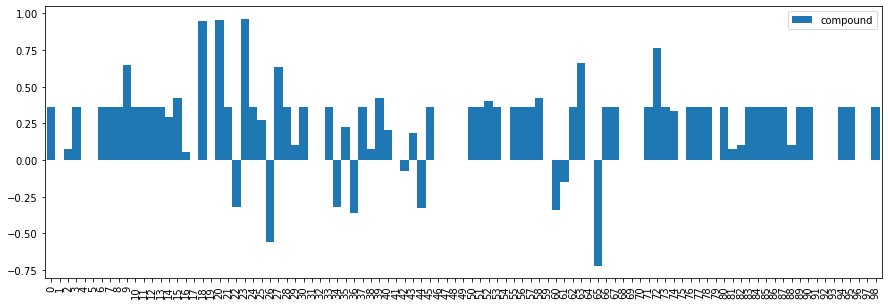

In [10]:
import pandas as pd
tweetdf = pd.DataFrame(tweetsWithSent)
tweetdf.plot.bar(figsize=(15,5),width=1)

In [11]:
print(tweets)

{'statuses': [{'created_at': 'Wed Mar 23 20:53:55 +0000 2022', 'id': 1506736017977614340, 'id_str': '1506736017977614340', 'full_text': 'RT @Jayecane: back to helping people ! dm me your cashapp, PayPal, Bitcoin now + rt + done', 'truncated': False, 'display_text_range': [0, 90], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'Jayecane', 'name': 'JAYE CANE', 'id': 35837162, 'id_str': '35837162', 'indices': [3, 12]}], 'urls': []}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1390345029437296644, 'id_str': '1390345029437296644', 'name': 'Safemoon Nigeria 🇳🇬𓃵', 'screen_name': 'Safemoon_naija', 'location': 'Milky Way Galaxy', 'description': 'Fan Page for Safemoon in Niger

### Using the function "analyzer.polarity_scores" for finding out the reviews

In [4]:
SentimentAnalysis = analyzer.polarity_scores("History is on the side of #Bitcoin. People want to be free.")
print(SentimentAnalysis)

# Here 'neg'= negative, 'neu'= neutral, 'pos' = positive

{'neg': 0.0, 'neu': 0.685, 'pos': 0.315, 'compound': 0.5574}
